# Try out dask
To find out what dask can do and have some hands on with codes.

[Dask in 8 Minutes: An Introduction](https://www.youtube.com/watch?v=nnndxbr_Xq4)

In [7]:
import numpy as np

images = np.ones((100, 1000, 1000))
images

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1.

In [8]:
import numpy as np

images = np.ones((10000, 1000, 1000))

MemoryError: Unable to allocate 74.5 GiB for an array with shape (10000, 1000, 1000) and data type float64

In [5]:
import dask.array as da

images = da.ones((10000, 1000, 1000))
images

,Array,Chunk
Bytes,74.51 GiB,119.21 MiB
Shape,"(10000, 1000, 1000)","(250, 250, 250)"
Count,640 Tasks,640 Chunks
Type,float64,numpy.ndarray


In [ ]:
from dask.distributed import Client
from dask_kubernetes import KubeCluster

cluster = KubeCluster()
client = Client(cluster)
cluster

In [ ]:
import dask.dataframe as dd
df = dd.read_csv(
    "gcs://anaconda-public-data/nyc-taxi/csv/2015/yellow_*.csv",
    storage_options={"token", "anon"},
    parse_dates=["tpep_pickup_datetime", "tpep_dropoff_datetime"]
).persist()

Dask is a platform to build distributed applications
- build scalable computing into a broad variety of applications
- is flexible, can parallelise many different kinds of workflows both in 
  - traditional Big data business computing space
  - also in many novel applications

In [ ]:
import dask.dataframe as dd

df = dd.read_csv("data/*.csv")
df.groupby("name").balance.mean()

In [ ]:
import dask.arrray as da
x = da.from_hdf5("...")
(x + x.T) - x.mean(axis=0)

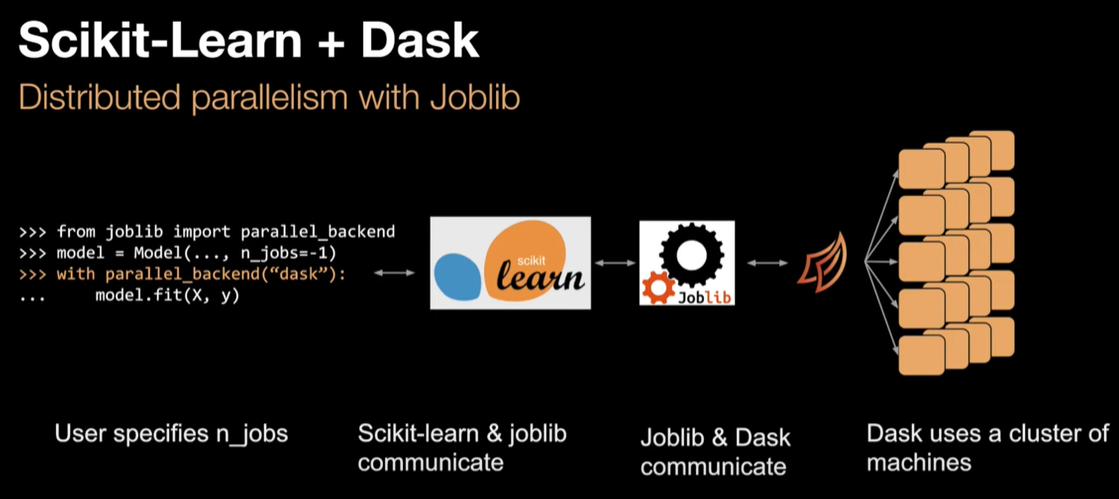

In [ ]:
# User specifies n_jobs
# Scikit-learn & joblib communicate
# Joblib uses threads/processes on a single machine

model = Model(..., n-jobs=-1)
model.fit(X,y)

# Dask uses a cluster of machines
from joblib import parallel_backend
model = Model(...,n_jobs=-1)
with parallel_backend("dask"):
    model.fit

Dask deploys on all major resource managers Cloud, HPC, or Yarn, it's all same to Dask.

yarn = Hadoop/Spark

Dask is already deployed on your laptop <br>
Conda or pip installable, included by default in Anaconda

In [ ]:
df = dd.read_parquet(...)

Dask is typically managed by a resource manager <br>
It co-exists alongside your other distributed services.
- Pods
- Kubernetes / Yarn / Slurm/PBS
- Hardware

## Welcome to the Dask Tutorial

https://tutorial.dask.org/00_overview.html

In [1]:
import dask.dataframe as dd
from dask.distributed import Client

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 5
Total threads: 20,Total memory: 15.71 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:61037,Workers: 5
Dashboard: http://127.0.0.1:8787/status,Total threads: 20
Started: Just now,Total memory: 15.71 GiB
Comm: tcp://127.0.0.1:61087,Total threads: 4
Dashboard: http://127.0.0.1:61088/status,Memory: 3.14 GiB
Nanny: tcp://127.0.0.1:61040,


In [ ]:
ddf = dd.read_parquet(
    "s3://dask-data/nyc-taxi/nyc-2015.praquet/part.*parquet",
    columns=["passenger_count", "tip_amount"],
    storage_options={"anon", True},
)